# Kaliningrad Graffiti dataset

Lets get some information from the Kaliningrad Graffiti dataset.

For example:
- plots graph of the Objects count distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import sys
import os

import cv2

import datetime

%matplotlib inline 

import seaborn as sns

np.random.seed(33)
                                                
import random as python_random
python_random.seed(33)

In [2]:
data_path = "/mnt/Data/graffiti/kgd"
path_images = os.path.join(data_path, "images")
path_labels = os.path.join(data_path, "labels")
print(path_images)

/mnt/Data/graffiti/kgd/images


In [3]:
images_filenames = sorted(glob.glob( os.path.join(path_images,"*.jpg") ))
print(len(images_filenames))
#labels_filenames = sorted(glob.glob( os.path.join(path_labels,"*.txt") ))
#print(len(labels_filenames))

1927


#### Getting information from the label files.

In [4]:
objects_count_lst = []
file_times = []
for img_filename in images_filenames:
    label_filename = img_filename.replace("images", "labels").replace(".jpg", ".txt")
    try:
        # read file and get lines (objects) count
        with open(label_filename, "r") as fs:
            lines = fs.readlines()
            objects_count_lst.append(len(lines))
            print(label_filename, len(lines))
        # get date and time from file's name
        filename_base = os.path.basename(img_filename)
        file_time = datetime.datetime.strptime(filename_base, "IMG_%Y%m%d_%H%M%S.jpg")
        print(filename_base, file_time)
        file_times.append(file_time)
    except Exception as e:
        print("Error:", e)

/mnt/Data/graffiti/kgd/labels/IMG_20220128_185312.txt 5
IMG_20220128_185312.jpg 2022-01-28 18:53:12
/mnt/Data/graffiti/kgd/labels/IMG_20220128_185356.txt 5
IMG_20220128_185356.jpg 2022-01-28 18:53:56
/mnt/Data/graffiti/kgd/labels/IMG_20220128_185412.txt 2
IMG_20220128_185412.jpg 2022-01-28 18:54:12
/mnt/Data/graffiti/kgd/labels/IMG_20220128_185748.txt 9
IMG_20220128_185748.jpg 2022-01-28 18:57:48
/mnt/Data/graffiti/kgd/labels/IMG_20220128_185757.txt 4
IMG_20220128_185757.jpg 2022-01-28 18:57:57
/mnt/Data/graffiti/kgd/labels/IMG_20220128_185814.txt 5
IMG_20220128_185814.jpg 2022-01-28 18:58:14
/mnt/Data/graffiti/kgd/labels/IMG_20220128_190008.txt 6
IMG_20220128_190008.jpg 2022-01-28 19:00:08
/mnt/Data/graffiti/kgd/labels/IMG_20220128_190050.txt 2
IMG_20220128_190050.jpg 2022-01-28 19:00:50
/mnt/Data/graffiti/kgd/labels/IMG_20220128_190107.txt 3
IMG_20220128_190107.jpg 2022-01-28 19:01:07
/mnt/Data/graffiti/kgd/labels/IMG_20220128_190753.txt 4
IMG_20220128_190753.jpg 2022-01-28 19:07:53


/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220220_154649.txt 9
IMG_20220220_154649.jpg 2022-02-20 15:46:49
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220220_154918.txt 6
IMG_20220220_154918.jpg 2022-02-20 15:49:18
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220220_155320.txt 3
IMG_20220220_155320.jpg 2022-02-20 15:53:20
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220225_091424.txt 6
IMG_20220225_091424.jpg 2022-02-25 09:14:24
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220225_091642.txt 26
IMG_20220225_091642.jpg 2022-02-25 09:16:42
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220225_092046.txt 5
IMG_20220225_092046.jpg 2022-02-25 09:20:46
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220225_092115.txt 2
IMG_20220225_092115.jpg 2022-02-25 09:21:15
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220327_185535.txt 1
IMG_20220327_185535.jpg 2022-03-27 18:55:35
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220407_185423.txt 13
IMG_20220407_185423.jpg 2022-04-07 18:54:23
/mnt/HD0/Data/graffiti/my/res/label

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220503_135204.txt 28
IMG_20220503_135204.jpg 2022-05-03 13:52:04
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092022.txt 1
IMG_20220506_092022.jpg 2022-05-06 09:20:22
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092143.txt 1
IMG_20220506_092143.jpg 2022-05-06 09:21:43
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092225.txt 1
IMG_20220506_092225.jpg 2022-05-06 09:22:25
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092255.txt 5
IMG_20220506_092255.jpg 2022-05-06 09:22:55
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092328.txt 10
IMG_20220506_092328.jpg 2022-05-06 09:23:28
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092354.txt 6
IMG_20220506_092354.jpg 2022-05-06 09:23:54
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092422.txt 5
IMG_20220506_092422.jpg 2022-05-06 09:24:22
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220506_092542.txt 1
IMG_20220506_092542.jpg 2022-05-06 09:25:42
/mnt/HD0/Data/graffiti/my/res/label

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_182716.txt 9
IMG_20220702_182716.jpg 2022-07-02 18:27:16
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_182801.txt 11
IMG_20220702_182801.jpg 2022-07-02 18:28:01
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183021.txt 1
IMG_20220702_183021.jpg 2022-07-02 18:30:21
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183137.txt 1
IMG_20220702_183137.jpg 2022-07-02 18:31:37
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183321.txt 3
IMG_20220702_183321.jpg 2022-07-02 18:33:21
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183404.txt 1
IMG_20220702_183404.jpg 2022-07-02 18:34:04
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183426.txt 6
IMG_20220702_183426.jpg 2022-07-02 18:34:26
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183520.txt 4
IMG_20220702_183520.jpg 2022-07-02 18:35:20
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220702_183533.txt 5
IMG_20220702_183533.jpg 2022-07-02 18:35:33
/mnt/HD0/Data/graffiti/my/res/labels

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175024.txt 12
IMG_20220703_175024.jpg 2022-07-03 17:50:24
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175029.txt 14
IMG_20220703_175029.jpg 2022-07-03 17:50:29
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175143.txt 5
IMG_20220703_175143.jpg 2022-07-03 17:51:43
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175205.txt 2
IMG_20220703_175205.jpg 2022-07-03 17:52:05
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175241.txt 1
IMG_20220703_175241.jpg 2022-07-03 17:52:41
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175257.txt 2
IMG_20220703_175257.jpg 2022-07-03 17:52:57
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175306.txt 19
IMG_20220703_175306.jpg 2022-07-03 17:53:06
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175319.txt 1
IMG_20220703_175319.jpg 2022-07-03 17:53:19
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_175537.txt 13
IMG_20220703_175537.jpg 2022-07-03 17:55:37
/mnt/HD0/Data/graffiti/my/res/lab

IMG_20220703_192710.jpg 2022-07-03 19:27:10
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_192842.txt 1
IMG_20220703_192842.jpg 2022-07-03 19:28:42
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220703_193558.txt 4
IMG_20220703_193558.jpg 2022-07-03 19:35:58
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085359.txt 8
IMG_20220705_085359.jpg 2022-07-05 08:53:59
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085414.txt 3
IMG_20220705_085414.jpg 2022-07-05 08:54:14
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085447.txt 4
IMG_20220705_085447.jpg 2022-07-05 08:54:47
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085506.txt 1
IMG_20220705_085506.jpg 2022-07-05 08:55:06
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085529.txt 1
IMG_20220705_085529.jpg 2022-07-05 08:55:29
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085610.txt 2
IMG_20220705_085610.jpg 2022-07-05 08:56:10
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220705_085806.txt 3
IMG_20220705_085806.jpg 2022-07-05 08

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_181314.txt 10
IMG_20220709_181314.jpg 2022-07-09 18:13:14
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_181435.txt 4
IMG_20220709_181435.jpg 2022-07-09 18:14:35
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_181533.txt 15
IMG_20220709_181533.jpg 2022-07-09 18:15:33
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_181548.txt 2
IMG_20220709_181548.jpg 2022-07-09 18:15:48
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_181649.txt 1
IMG_20220709_181649.jpg 2022-07-09 18:16:49
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_181710.txt 1
IMG_20220709_181710.jpg 2022-07-09 18:17:10
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_182054.txt 1
IMG_20220709_182054.jpg 2022-07-09 18:20:54
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_182256.txt 2
IMG_20220709_182256.jpg 2022-07-09 18:22:56
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_182331.txt 6
IMG_20220709_182331.jpg 2022-07-09 18:23:31
/mnt/HD0/Data/graffiti/my/res/label

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_201151.txt 27
IMG_20220709_201151.jpg 2022-07-09 20:11:51
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_201244.txt 19
IMG_20220709_201244.jpg 2022-07-09 20:12:44
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_201307.txt 16
IMG_20220709_201307.jpg 2022-07-09 20:13:07
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_201357.txt 28
IMG_20220709_201357.jpg 2022-07-09 20:13:57
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220709_201428.txt 16
IMG_20220709_201428.jpg 2022-07-09 20:14:28
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220710_184003.txt 5
IMG_20220710_184003.jpg 2022-07-10 18:40:03
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220710_184140.txt 2
IMG_20220710_184140.jpg 2022-07-10 18:41:40
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220710_184530.txt 33
IMG_20220710_184530.jpg 2022-07-10 18:45:30
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220710_184545.txt 29
IMG_20220710_184545.jpg 2022-07-10 18:45:45
/mnt/HD0/Data/graffiti/my/res/

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171413.txt 12
IMG_20220717_171413.jpg 2022-07-17 17:14:13
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171416.txt 9
IMG_20220717_171416.jpg 2022-07-17 17:14:16
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171657.txt 4
IMG_20220717_171657.jpg 2022-07-17 17:16:57
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171729.txt 30
IMG_20220717_171729.jpg 2022-07-17 17:17:29
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171749.txt 2
IMG_20220717_171749.jpg 2022-07-17 17:17:49
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171819.txt 3
IMG_20220717_171819.jpg 2022-07-17 17:18:19
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171843.txt 18
IMG_20220717_171843.jpg 2022-07-17 17:18:43
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_171943.txt 9
IMG_20220717_171943.jpg 2022-07-17 17:19:43
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220717_172018.txt 2
IMG_20220717_172018.jpg 2022-07-17 17:20:18
/mnt/HD0/Data/graffiti/my/res/labe

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132039.txt 9
IMG_20220807_132039.jpg 2022-08-07 13:20:39
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132132.txt 5
IMG_20220807_132132.jpg 2022-08-07 13:21:32
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132145.txt 5
IMG_20220807_132145.jpg 2022-08-07 13:21:45
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132214.txt 3
IMG_20220807_132214.jpg 2022-08-07 13:22:14
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132231.txt 9
IMG_20220807_132231.jpg 2022-08-07 13:22:31
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132313.txt 5
IMG_20220807_132313.jpg 2022-08-07 13:23:13
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132437.txt 4
IMG_20220807_132437.jpg 2022-08-07 13:24:37
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132444.txt 6
IMG_20220807_132444.jpg 2022-08-07 13:24:44
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_132627.txt 6
IMG_20220807_132627.jpg 2022-08-07 13:26:27
/mnt/HD0/Data/graffiti/my/res/labels/

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_152320.txt 11
IMG_20220807_152320.jpg 2022-08-07 15:23:20
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_152337.txt 4
IMG_20220807_152337.jpg 2022-08-07 15:23:37
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_152404.txt 3
IMG_20220807_152404.jpg 2022-08-07 15:24:04
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_152416.txt 17
IMG_20220807_152416.jpg 2022-08-07 15:24:16
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_152511.txt 2
IMG_20220807_152511.jpg 2022-08-07 15:25:11
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_152529.txt 3
IMG_20220807_152529.jpg 2022-08-07 15:25:29
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_153205.txt 14
IMG_20220807_153205.jpg 2022-08-07 15:32:05
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_153750.txt 4
IMG_20220807_153750.jpg 2022-08-07 15:37:50
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20220807_153818.txt 5
IMG_20220807_153818.jpg 2022-08-07 15:38:18
/mnt/HD0/Data/graffiti/my/res/labe

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_080851.txt 18
IMG_20221018_080851.jpg 2022-10-18 08:08:51
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_080921.txt 4
IMG_20221018_080921.jpg 2022-10-18 08:09:21
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_080932.txt 2
IMG_20221018_080932.jpg 2022-10-18 08:09:32
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_080949.txt 1
IMG_20221018_080949.jpg 2022-10-18 08:09:49
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_081046.txt 1
IMG_20221018_081046.jpg 2022-10-18 08:10:46
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_081115.txt 1
IMG_20221018_081115.jpg 2022-10-18 08:11:15
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_081133.txt 2
IMG_20221018_081133.jpg 2022-10-18 08:11:33
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_081205.txt 2
IMG_20221018_081205.jpg 2022-10-18 08:12:05
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221018_081231.txt 20
IMG_20221018_081231.jpg 2022-10-18 08:12:31
/mnt/HD0/Data/graffiti/my/res/label

/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221218_112036.txt 6
IMG_20221218_112036.jpg 2022-12-18 11:20:36
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221218_112047.txt 27
IMG_20221218_112047.jpg 2022-12-18 11:20:47
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221218_113257.txt 3
IMG_20221218_113257.jpg 2022-12-18 11:32:57
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221218_113618.txt 10
IMG_20221218_113618.jpg 2022-12-18 11:36:18
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221218_113846.txt 1
IMG_20221218_113846.jpg 2022-12-18 11:38:46
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20221218_114817.txt 7
IMG_20221218_114817.jpg 2022-12-18 11:48:17
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230105_201745.txt 27
IMG_20230105_201745.jpg 2023-01-05 20:17:45
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230113_163706.txt 2
IMG_20230113_163706.jpg 2023-01-13 16:37:06
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230113_163711.txt 3
IMG_20230113_163711.jpg 2023-01-13 16:37:11
/mnt/HD0/Data/graffiti/my/res/labe

IMG_20230325_093432.jpg 2023-03-25 09:34:32
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_093518.txt 5
IMG_20230325_093518.jpg 2023-03-25 09:35:18
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095018.txt 1
IMG_20230325_095018.jpg 2023-03-25 09:50:18
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095103.txt 5
IMG_20230325_095103.jpg 2023-03-25 09:51:03
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095155.txt 4
IMG_20230325_095155.jpg 2023-03-25 09:51:55
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095530.txt 7
IMG_20230325_095530.jpg 2023-03-25 09:55:30
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095636.txt 7
IMG_20230325_095636.jpg 2023-03-25 09:56:36
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095702.txt 36
IMG_20230325_095702.jpg 2023-03-25 09:57:02
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095720.txt 12
IMG_20230325_095720.jpg 2023-03-25 09:57:20
/mnt/HD0/Data/graffiti/my/res/labels/IMG_20230325_095752.txt 6
IMG_20230325_095752.jpg 2023-03-25 

In [5]:
df = pd.DataFrame(list(zip(images_filenames, file_times, objects_count_lst)), columns=['image', 'time', 'count'])
df.head()

,image,time,count
0,/mnt/Data/graffiti/kgd/images/IMG_20220128_185...,2022-01-28 18:53:12,5
1,/mnt/Data/graffiti/kgd/images/IMG_20220128_185...,2022-01-28 18:53:56,5
2,/mnt/Data/graffiti/kgd/images/IMG_20220128_185...,2022-01-28 18:54:12,2
3,/mnt/Data/graffiti/kgd/images/IMG_20220128_185...,2022-01-28 18:57:48,9
4,/mnt/Data/graffiti/kgd/images/IMG_20220128_185...,2022-01-28 18:57:57,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   image   1927 non-null   object        
 1   time    1927 non-null   datetime64[ns]
 2   count   1927 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 45.3+ KB


In [7]:
df.describe()

,time,count
count,1927,1927.000000
mean,2022-07-02 13:40:37.321743616,6.418786
min,2022-01-28 18:53:12,1.000000
25%,2022-04-13 18:44:16.500000,2.000000
50%,2022-07-05 09:10:59,4.000000
75%,2022-08-07 14:00:38.500000,8.000000
max,2023-09-13 08:49:37,66.000000
std,NaN,7.139139


In [8]:
df["count"].value_counts()

count
1     370
2     264
3     246
5     160
4     155
6     116
7      89
8      72
9      62
11     53
10     51
12     39
15     30
13     28
14     28
16     25
25     12
19     12
20     12
17     11
21      8
24      7
18      7
28      6
26      6
27      6
23      5
22      5
35      4
30      4
31      4
32      4
38      3
42      3
34      3
39      2
45      2
36      2
29      2
33      2
51      2
59      1
37      1
43      1
66      1
40      1
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Objects count distribution')

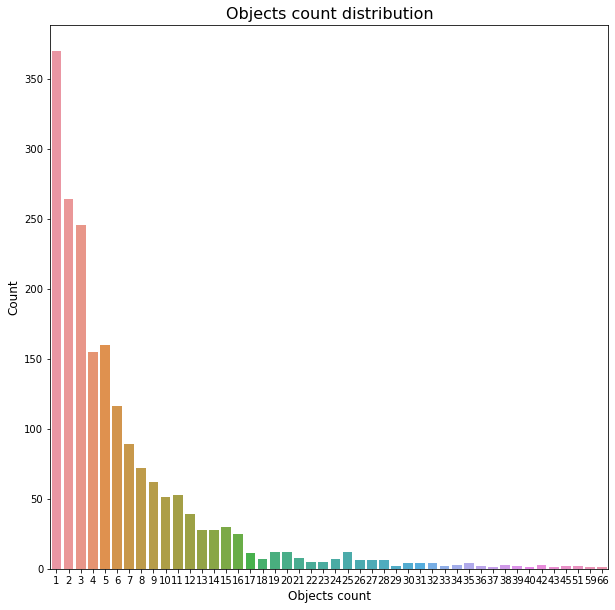

In [9]:
bar, ax = plt.subplots(figsize=(10,10))
sns.countplot(x = "count", data = df)
plt.xlabel('Objects count', size=12)
plt.ylabel('Count', size=12)
plt.title('Objects count distribution', size=16)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Objects count over photo time')

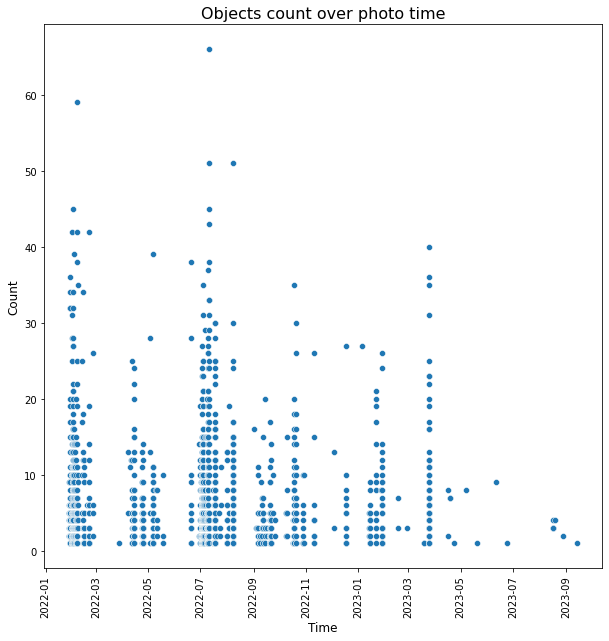

In [10]:
bar, ax = plt.subplots(figsize=(10,10))
#plt.plot(df['time'], df['count'], '.')
sns.scatterplot(data=df, x='time', y='count')
plt.xticks(rotation='vertical')
plt.xlabel('Time', size=12)
plt.ylabel('Count', size=12)
plt.title('Objects count over photo time', size=16)

#### Lets show images with a lot of objects.

counts: [40 66 43 37 59 51 33 29 36 45 39 34 42 38 32 31 30 35 22 23 27 26 28 18
 24 21 17 20 19 25 16 14 13 15 12 10 11  9  8  7  6  4  5  3  2  1]
number: [  1   1   1   1   1   2   2   2   2   2   2   3   3   3   4   4   4   4
   5   5   6   6   6   7   7   8  11  12  12  12  25  28  28  30  39  51
  53  62  72  89 116 155 160 246 264 370]
[40 66 43 37 59 51 33 29 36 45]
40
/mnt/Data/graffiti/kgd/images/IMG_20230325_102713.jpg


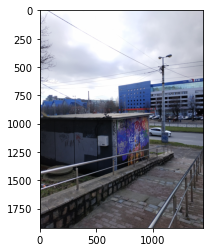

66
/mnt/Data/graffiti/kgd/images/IMG_20220710_184819.jpg


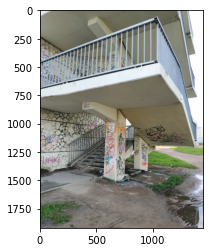

43
/mnt/Data/graffiti/kgd/images/IMG_20220710_184623.jpg


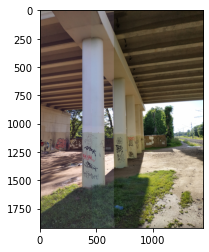

37
/mnt/Data/graffiti/kgd/images/IMG_20220709_200736.jpg


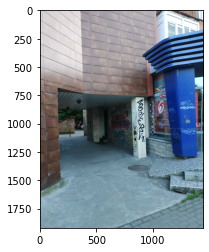

59
/mnt/Data/graffiti/kgd/images/IMG_20220206_151408.jpg


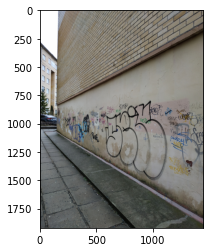

51
/mnt/Data/graffiti/kgd/images/IMG_20220710_184700.jpg


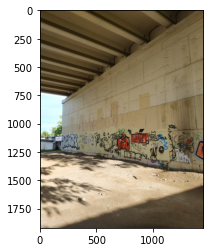

33
/mnt/Data/graffiti/kgd/images/IMG_20220710_184530.jpg


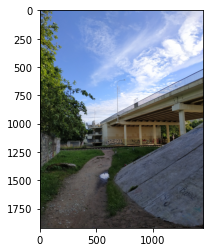

29
/mnt/Data/graffiti/kgd/images/IMG_20220705_190117.jpg


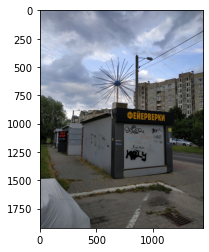

36
/mnt/Data/graffiti/kgd/images/IMG_20220129_185114.jpg


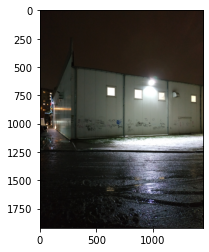

45
/mnt/Data/graffiti/kgd/images/IMG_20220201_124747.jpg


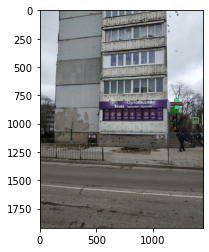

In [11]:
def show_image_by_count(count):
    img_filename = df.loc[df['count'] == count]["image"].values[0]
    print(img_filename)
    img = cv2.imread(img_filename)
    plt.imshow(img[:,:,::-1])
    plt.show()

counts = df["count"].value_counts()
print("counts:", counts.index.values[::-1])
print("number:", counts.values[::-1])
print(counts.index.values[::-1][:10])
for v in counts.index.values[::-1][:10]:
    print(v)
    show_image_by_count(v)